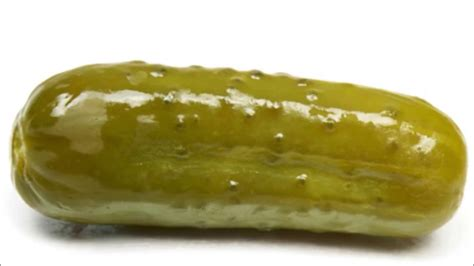

In [1]:
import pandas as pd

In [ ]:
# filter out certain data
def gereral_data_filter(df, labels, filter_on, amount_higher_than):
    ## Filter info
    classes_count = labels.groupby(filter_on).count()
    classes_to_keep = list(classes_count[classes_count[classes_count.columns[-1]] >= amount_higher_than].index)
    keep_indices = labels[filter_on].isin(classes_to_keep)
    
    ## delete entries part of class that's too small, remove names column
    return (df[keep_indices].drop(columns=["Unnamed: 0"]), labels[keep_indices])

# First dataset

In [ ]:
%%time

# load labels
labels = pd.read_csv('../data/Lauren/Labels.csv')
#labels.head() # to display the first 5 lines of loaded data

# load data
df = pd.read_csv('../data/Lauren/Filtered_mouse_allen_brain_data.csv') # takes about 5min


CPU times: user 4min 30s, sys: 6.65 s, total: 4min 36s
Wall time: 4min 41s


In [ ]:
%%time

df, labels = gereral_data_filter(df, labels, "cluster", 10)

CPU times: user 1.57 s, sys: 15.3 s, total: 16.9 s
Wall time: 17 s


In [ ]:
df.to_pickle("../data/Lauren/bam_df.pkl")
labels.to_pickle("../data/Lauren/bam_labels.pkl")

# Second dataset

**This cell might give a random warning**

In [4]:
%%time

# load labels
labels = pd.read_csv('../data/Lauren/CovidBALLabel.csv', names=range(-2, 6), usecols=range(2, 8), sep="[_,]", engine="python")
labels_orig = pd.read_csv('../data/Lauren/CovidBALLabel.csv', names=["-", "hyr"], usecols=[1], sep=",")

# load data
df = pd.read_csv('../data/Lauren/CovidBALCounts.csv')
df = df.transpose()


CPU times: user 2min 8s, sys: 9.39 s, total: 2min 17s
Wall time: 2min 23s


In [5]:
print(labels.shape)
print(labels_orig.shape)
print(df.shape)

(19282, 6)
(19282, 1)
(19282, 24444)


In [6]:
print(labels.head())
print(labels_orig.head())
print(df.head())

        0            1     2        3       4     5
0       G  Neutrophils  None     None    None  None
1       L            T   CD4    naive  naive1  None
2  Prolif            L     T      CD4    None  None
3       L            T   CD4  exhaust    None  None
4     Epi     Ionocyte  None     None    None  None
                    hyr
0         G_Neutrophils
1  L_T_CD4_naive_naive1
2        Prolif_L_T_CD4
3       L_T_CD4_exhaust
4          Epi_Ionocyte
                           AL627309.1  AL627309.4  AL669831.5  FAM87B  \
COV013_AAACCCAAGCATCCCG-1           0           0           0       0   
COV013_AAACCCAAGTGGATTA-1           0           0           0       0   
COV013_AAACCCACACAACATC-1           0           0           0       0   
COV013_AAACCCACACGCCAGT-1           0           0           0       0   
COV013_AAACCCACACGTACAT-1           0           0           1       0   

                           LINC00115  FAM41C  AL645608.3  SAMD11  NOC2L  \
COV013_AAACCCAAGCATCCCG-1     

In [7]:
# filteren tests
amount_higher_than=10

classes_count = labels_orig.value_counts()
classes_to_keep = classes_count[classes_count >= amount_higher_than]
classes_to_keep = [l[0] for l in classes_to_keep.index.values]

keep_indices = labels_orig["hyr"].isin(classes_to_keep)

orig_len = labels.shape[0]
labels_filtered = labels[keep_indices]

keep_indices.index = df.index
df_filtered = df[keep_indices]

print(f"{orig_len - len(df_filtered)} rows removed")

42 rows removed


In [8]:
print(labels_filtered.shape)
print(df_filtered.shape)

(19240, 6)
(19240, 24444)


In [12]:
%%time

df_filtered.to_pickle("../data/Lauren/covid_df.pkl")
labels_filtered.to_pickle("../data/Lauren/covid_labels.pkl")

CPU times: user 279 ms, sys: 2.54 s, total: 2.82 s
Wall time: 6.59 s


In [10]:
%%time

# TEST loading
df = pd.read_pickle("../data/Lauren/covid_df.pkl")
labels = pd.read_pickle("../data/Lauren/covid_labels.pkl")
labels.head()
df.head()

CPU times: user 39.6 ms, sys: 3.44 s, total: 3.48 s
Wall time: 3.81 s


,AL627309.1,AL627309.4,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,NOC2L,KLHL17,...,AC005828.2,LINC01977,MEP1B,CSTL1,AL034550.1,JPH2,PRODH2,PSG5,TEX101,AC007663.2
COV013_AAACCCAAGCATCCCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COV013_AAACCCAAGTGGATTA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COV013_AAACCCACACAACATC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COV013_AAACCCACACGCCAGT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COV013_AAACCCACAGACGATG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
